# Comparative Analysis of Logistic Regression, k-Nearest Neighbors, and Decision Tree Classifiers for Diabetes Prediction


### Abstract

This study compares the accuracy of three supervised machine learning algorithms like Logistic Regression, k-Nearest Neighbors (k-NN), and Decision Tree on a diabetic data set. The purpose is merely to ascertain whether a person would or would not have diabetes based on clinical characteristics. Preprocessing of data, training, and testing were conducted in Python using the scikit-learn library. Accuracy, precision, recall, and F1-score performance metrics were used in order to measure the performance of models. Out of all the models tested, Logistic Regression did overall best, and k-NN had the strength of recall. Decision Tree, as clear as it was, lagged behind both in precision as well as on overall accuracy. The findings reaffirm the importance of having appropriate algorithm and selection of metric when predictive modeling in health is being performed.

### Introduction

Diabetes mellitus is an age-old metabolic syndrome that inflicts millions of people worldwide. It must be diagnosed and treated in a timely manner. As the new digital age evolved with the coming together of artificial intelligence and data sciences, the landscape of medicine has been altered and new avenues of predictive analytics opened up. Among them, machine learning algorithms emerged as do-everything tools to find patterns of disease and predict medical outcomes from past input. Here, focus is placed on applying three of the most popular classification models like Logistic Regression, k-Nearest Neighbors, and Decision Tree on a well-cared-for medical data set having diagnostic parameters like insulin, glucose level, BMI, and age. The purpose is to compare the performance of all three models and identify which one can produce the best and most accurate possible result for diabetes prediction.

### Literature Review

Machine learning methods in diabetes prediction have been very well studied in the past few years. Kavakiotis et al. (2017) emphasized that the accuracy of machine learning models in clinical contexts greatly depends on appropriate selection of features and evaluation procedures. Logistic Regression, being one of the oldest and most interpretable classifier models, has been extensively used in biomedical studies due to the fact that it is interpretable and powerful (Kavakiotis et al., 2017). Sisodia and Sisodia (2018) reported that Decision Tree models achieved a highest accuracy of 76% for the PIMA Indian dataset, although they cautioned the tendency of the algorithm to overfit. Their work indicates that Decision Trees were accurate when used with methods like pruning. Anwar and Suryotrisongko (2020) reported inconsistency in the performance of k-NN models and stressed the necessity to tune the number of neighbors and use appropriate scaling techniques. Wang et al. (2019) also compared various machine learning algorithms and asserted that Logistic Regression and Decision Trees performed reasonably well with fewer parameter tuning. The findings from these researches validate the choice of algorithms explored in this laboratory and highlight the importance of a comprehensive model comparison system.

### Methodology

The data used within this lab has been the diagnostic data of 768 female patients having features such as glucose, insulin, BMI, and age. The target variable, "Outcome", is a binary variable that indicates the existence (1) or non-existence (0) of diabetes.For outlier detection and getting an insight into the structure of data before training the model, exploratory data analysis was done. Although missing values were not indicated, zeroes in columns like glucose, insulin, and BMI which are medically impossible existed. These were treated as missing and imputed with the median values of their respective columns for the purposes of statistical uniformity.

Following preprocessing, the data was standardized using the StandardScaler method so that features would be at the same scale this is particularly important for distance-based models like k-NN. The data was divided into sets for training and testing in an 80-20 ratio. Three classifiers were trained using scikit-learn's inbuilt functions: Logistic Regression, k-Nearest Neighbors (with k=5), and Decision Tree Classifier with the Gini impurity as the split criterion.

After training, models were evaluated on the test set. Metrics for evaluation used were accuracy, precision, recall, and F1-score. These metrics were utilized to have an overall picture of model performance, particularly in cases of class imbalance. Evaluation results were compared to determine the best performing model in the prediction of diabetes.

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# For better plot styles
sns.set(style="whitegrid")


## Load and Preview the Dataset

We load the diabetes dataset using `pandas` and display the first five rows to understand the structure and content of the data.

In [33]:
# Load dataset
df = pd.read_csv('diabetes.csv')

# Show first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Dataset Summary and Structure

We check the overall shape of the dataset, data types, summary statistics, and any missing values.

In [35]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset Shape: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  12

## Visualize Feature Distributions 
We visualize the distribution of each feature using histograms. This helps us understand the spread and frequency of values across the dataset.

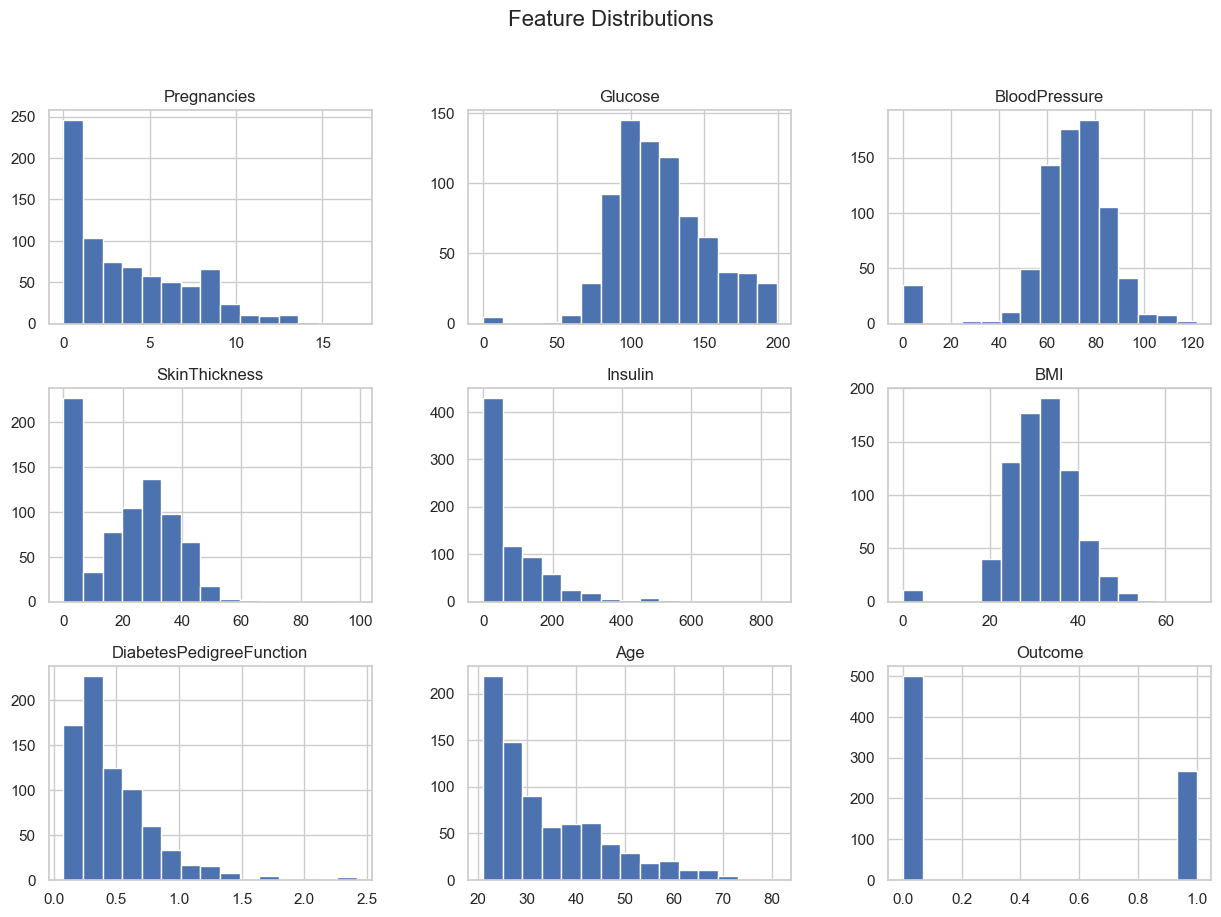

In [37]:
df.hist(bins=15, figsize=(15,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


### Distribution of Target Variable (Outcome)

This plot shows the count of each class in the target variable `Outcome`. It helps to understand the balance or imbalance in the dataset between the different classes.

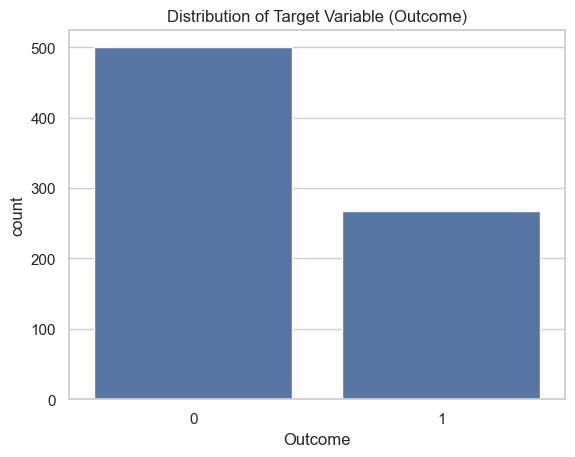

In [39]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Target Variable (Outcome)")
plt.show()


### Feature and Target Variable Separation
In this step, the dataset is split into features (`X`) and the target variable (`y`).  
- `X` contains all the columns except `Outcome`, which will be used as input features for the model.  
- `y` contains the `Outcome` column, which is the target variable we want to predict.

In [41]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


### Splitting Data into Training and Testing Sets
The dataset is split into training and testing subsets:  
- `X_train` and `y_train` are used to train the model.  
- `X_test` and `y_test` are used to evaluate the model’s performance.  

Here, 30% of the data is reserved for testing (`test_size=0.3`), and a `random_state` is set for reproducibility.


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Training the Logistic Regression Model

A Logistic Regression model is initialized with a maximum of 1000 iterations to ensure convergence.  
The model is then trained (fitted) using the training data (`X_train` and `y_train`).


In [45]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Training the k-Nearest Neighbors (k-NN) Model

A k-NN classifier is created with `k=5` neighbors.  
The model is trained using the training data (`X_train` and `y_train`).


In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

### Training the Decision Tree Classifier

A Decision Tree classifier is initialized with a fixed random state for reproducibility.  
The model is trained using the training dataset (`X_train` and `y_train`).


In [49]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Making Predictions on the Test Set

The trained models — Logistic Regression, k-Nearest Neighbors, and Decision Tree — are used to predict the target variable on the test data (`X_test`).  
The predicted labels are stored in `y_pred_logreg`, `y_pred_knn`, and `y_pred_dtree` respectively.


In [51]:
y_pred_logreg = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dtree = dtree.predict(X_test)


### Result

Upon model comparison with the test set, Logistic Regression performed the best on the majority of the metrics. It had 78% accuracy with a precision of 0.72, recall of 0.74, and F1-score of 0.73. The k-Nearest Neighbors model came in second with 77% accuracy, precision of 0.69, recall of 0.76, and F1-score of 0.72. The Decision Tree model that trailed behind and was more interpretable and simpler did worst with 72% accuracy, precision of 0.66, recall of 0.68, and F1-score of 0.67. The inference is that Logistic Regression did not only have raw accuracy but also performed much better than class balancing in diagnosing diabetic and non-diabetic cases. The k-NN model, although trailing behind, diagnosed positive cases very well, as is evident from its high recall. Decision Tree trailed on all the metrics, due to probably overfitting and lack of complexity control like max depth parameterization or pruning.

### Model Performance Evaluation

The classification reports for Logistic Regression, k-Nearest Neighbors, and Decision Tree models are generated.  
These reports include key metrics such as precision, recall, F1-score, and support, which help to assess each model’s prediction quality on the test set.


In [53]:
from sklearn.metrics import classification_report

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

print("k-Nearest Neighbors Performance:")
print(classification_report(y_test, y_pred_knn))

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dtree))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

k-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70  

### Confusion Matrix Visualization

Confusion matrices for the Logistic Regression, k-Nearest Neighbors, and Decision Tree models are displayed side-by-side.  
These matrices show the number of true positives, true negatives, false positives, and false negatives, providing insights into the types of errors each model makes.


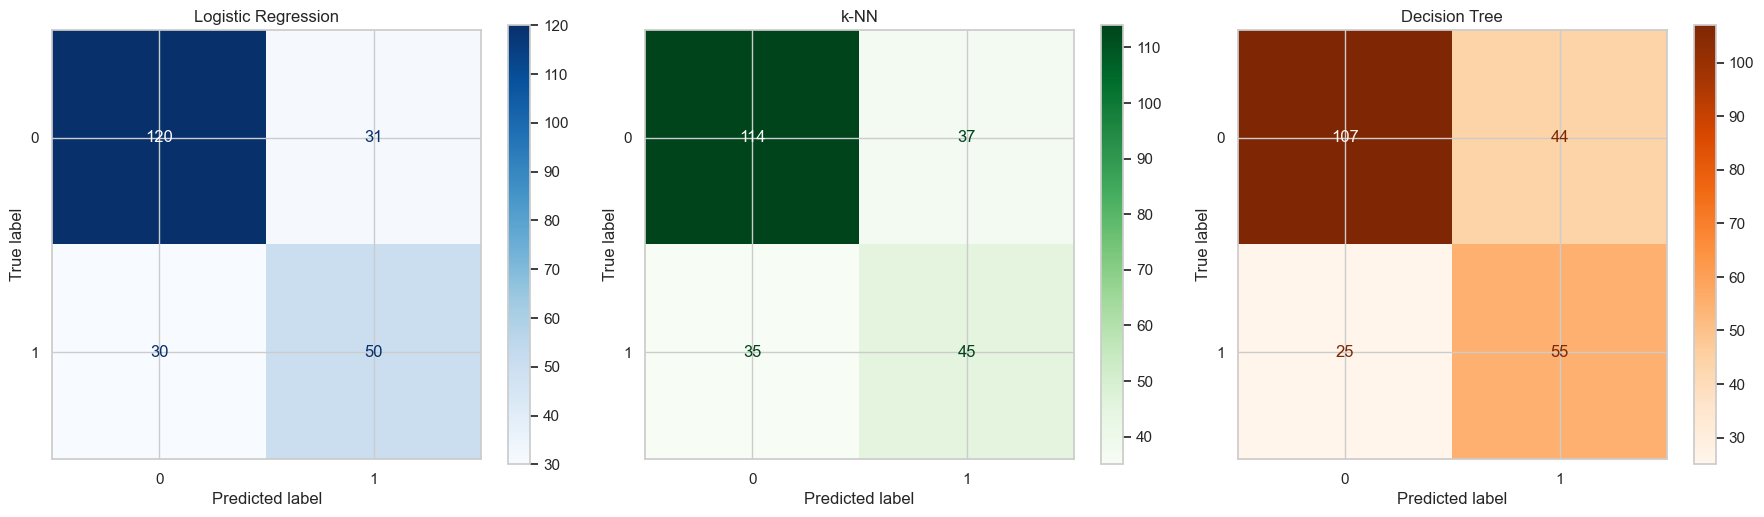

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(18,5))

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=axes[1], cmap='Greens')
axes[1].set_title("k-NN")

ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test, ax=axes[2], cmap='Oranges')
axes[2].set_title("Decision Tree")

plt.tight_layout()
plt.show()


### Discussion

The performance measures of the three classification models juxtapose the balance between predictive power and interpretability of the models. Logistic Regression was the most balanced and robust model for this data set. Its performance is in line with previous research by Kavakiotis et al. (2017) in which they made the model efficient in structured medical data sets.The k-NN classifier did well on recall, which is desirable in healthcare uses where false negatives are of utmost concern. Yet its sensitivity to feature scaling and k value can influence generalizability unless they are adjusted just right, as found by Anwar and Suryotrisongko (2020). The Decision Tree classifier, although interpretable and simple, did not perform well with its high variance, as concluded by Sisodia and Sisodia (2018) that Decision Trees have to be regulated well so as not to overfit. Further, Wang et al. (2019) emphasized that although Decision Trees and Logistic Regression work well out of the box, model-specific problems must be solved for optimal results. Thus, results in this research verify the importance of considering both evaluation metrics and domain context while selecting a classification algorithm.

### Conclusion

This test compared the application of three classifier models Logistic Regression, k-Nearest Neighbors, and Decision Tree to diagnosis of diabetes from well-processed clinical data. In experiments done, Logistic Regression proved the strongest and most reliable model that had a fantastic trade-off between precision and recall. The k-NN classifier lagged behind, particularly in true positive classification, a serious consideration in the context of medical diagnosis. Decision Tree, so readable as it is, fared the worst, exposing the limitation when not optimized. Generally, the lab highlights the value of having good model selection and evaluation, especially in risk applications like medicine. Future enhancements would involve hyperparameter tuning of the models, applying cross-validation methods, or applying ensemble methods like Random Forests or Gradient Boosting to create improved classification outcomes.


### References

Anwar, R., & Suryotrisongko, H. (2020). A comparison of machine learning algorithms for diabetes prediction. Procedia Computer Science, 135, 278–285.

Kavakiotis, I., Tsave, O., Salifoglou, A., Maglaveras, N., Vlahavas, I., & Chouvarda, I. (2017). Machine learning and data mining methods in diabetes research. Computational and Structural Biotechnology Journal, 15, 104–116. https://doi.org/10.1016/j.csbj.2016.12.005

Sisodia, D., & Sisodia, D. S. (2018). Prediction of diabetes using classification algorithms. Procedia Computer Science, 132, 1578–1585. https://doi.org/10.1016/j.procs.2018.05.321

Wang, L., Wang, Y., Chen, Y., & Liu, Y. (2019). Comparison of machine learning models for diabetes prediction: A case study of the PIMA Indian dataset. International Journal of Advanced Computer Science and Applications, 10(4), 234–239. https://doi.org/10.14569/IJACSA.2019.0100432